In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv('train.csv')
titanic = df.copy()
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# EDA

Text(0.5, 1.0, 'Poor Women Survived')

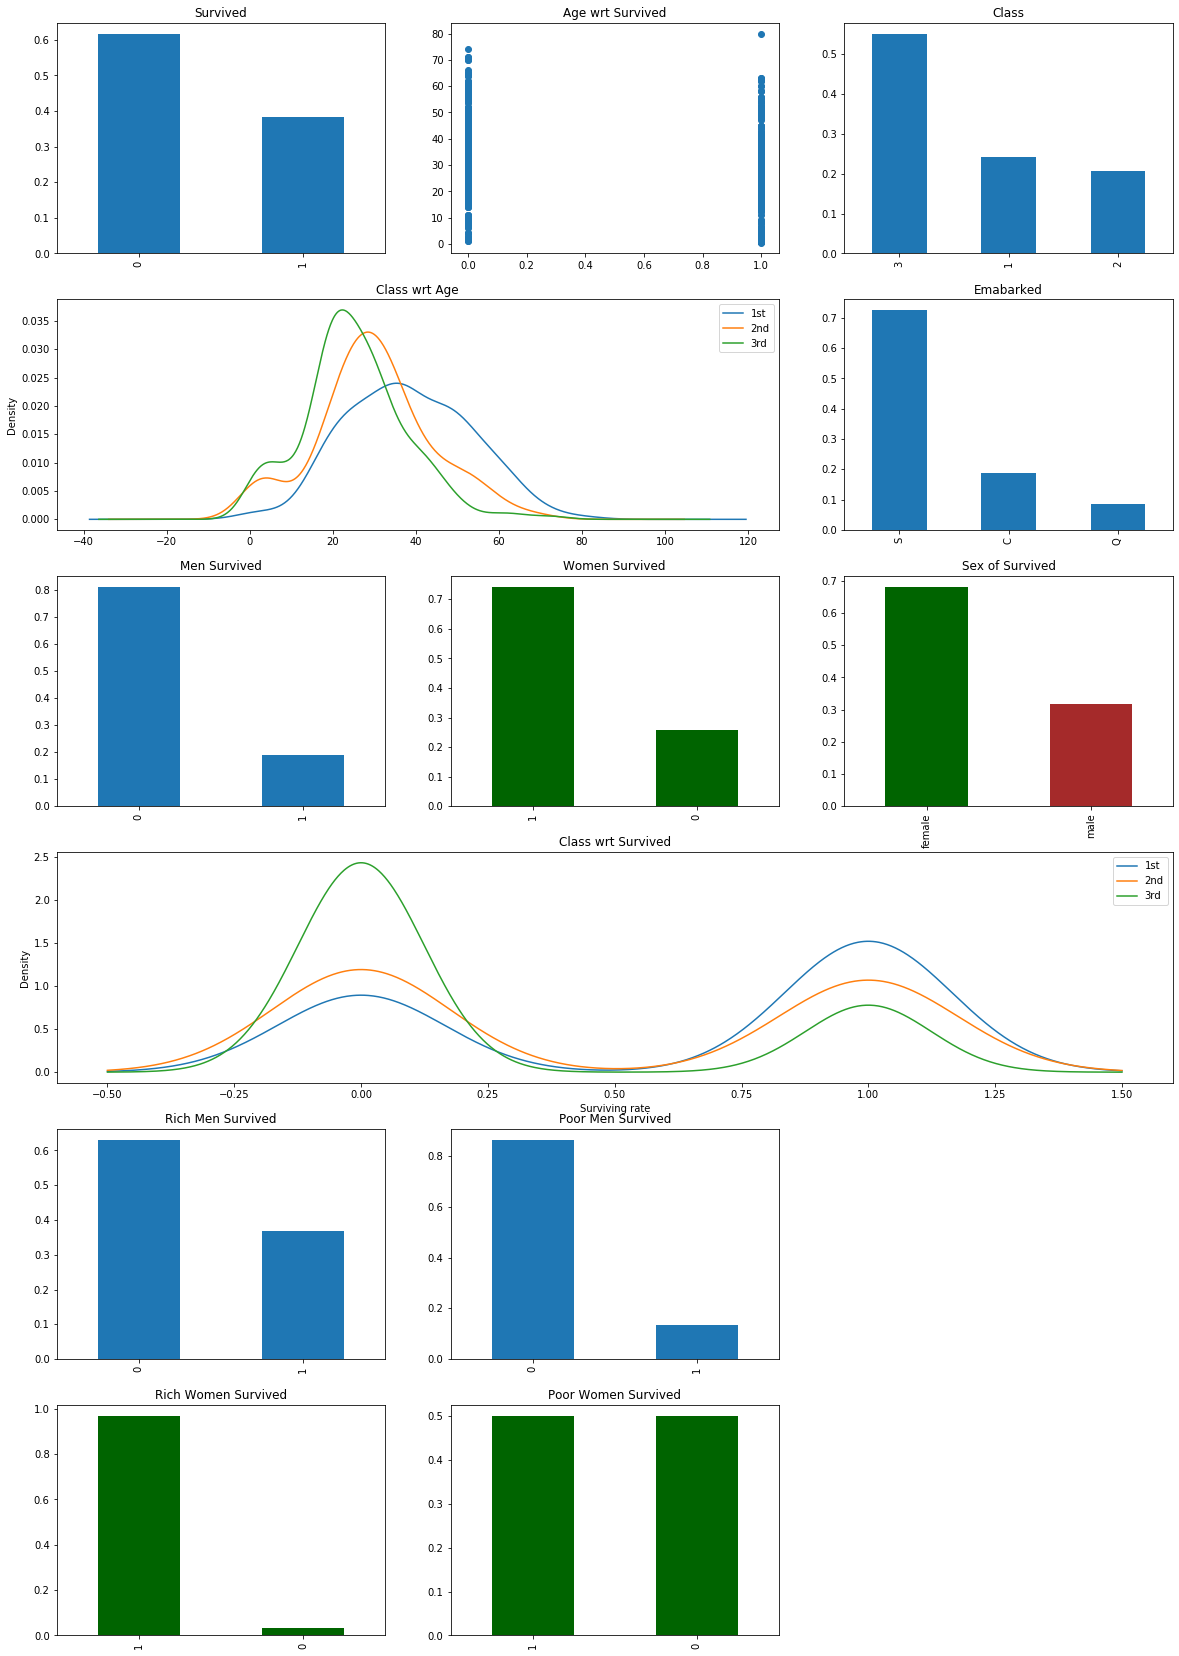

In [145]:
plt.figure(figsize=(20,50))

plt.subplot2grid((10,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

plt.subplot2grid((10,3),(0,1))
plt.scatter(df.Survived, df.Age)
plt.title('Age wrt Survived')

plt.subplot2grid((10,3),(0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar")
plt.title("Class")

plt.subplot2grid((10,3),(1,0),colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde')

plt.title('Class wrt Age')
plt.legend(('1st','2nd','3rd'))

plt.subplot2grid((10,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind="bar")
plt.title("Emabarked")


plt.subplot2grid((10,3),(2,0))
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind="bar")
plt.title("Men Survived")

plt.subplot2grid((10,3),(2,1))
df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind="bar", color='darkgreen')
plt.title("Women Survived")

plt.subplot2grid((10,3),(2,2))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind="bar", color=['darkgreen', 'brown'])
plt.title("Sex of Survived")

plt.subplot2grid((10,3),(3,0),colspan=3)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Class wrt Survived')
plt.legend(('1st','2nd','3rd'))    
plt.xlabel('Surviving rate')

plt.subplot2grid((10,3),(4,0))
df.Survived[(df.Sex == 'male') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich Men Survived")

plt.subplot2grid((10,3),(4,1))
df.Survived[(df.Sex == 'male') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor Men Survived")

plt.subplot2grid((10,3),(5,0))
df.Survived[(df.Sex == 'female') & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", color='darkgreen')
plt.title("Rich Women Survived")

plt.subplot2grid((10,3),(5,1))
df.Survived[(df.Sex == 'female') & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", color='darkgreen')
plt.title("Poor Women Survived")

# Cleaning data

In [146]:
def clean_data(df):
    df['Fare'] = df['Fare'].fillna(df['Fare'].dropna().median())
    df['Age'] = df['Age'].fillna(df['Age'].dropna().median())
    df.drop('Cabin', axis=1, inplace=True)
    
    
    df.loc[df['Sex'] == 'male', 'Sex'] = 0
    df.loc[df['Sex'] == 'female', 'Sex'] = 1
    
    df['Embarked'] = df['Embarked'].fillna('S')
    df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
    df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
    df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

In [147]:
clean_data(df)

In [148]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dropping unwanted features

In [149]:
df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

# Dividing the dataset

In [150]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [151]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Train test split

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

### Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr_model =lr1.fit(X_train,y_train)
pred1 = lr1.predict(X_test)
accuracy= accuracy_score(pred1, y_test)
accuracy

0.8603351955307262

### Decision Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_split=2)
dt_model = dt1.fit(X_train, y_train)
pred2 = dt1.predict(X_test)
accuracy= accuracy_score(pred2, y_test)
accuracy

0.8268156424581006

### Random Tree Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(criterion='entropy', max_depth=3)
rf_model = rf1.fit(X_train, y_train)
pred3 = rf1.predict(X_test)
accuracy = round(accuracy_score(y_test, pred3),2)
print('Model Accuracy :', accuracy*100)

Model Accuracy : 80.0


# Cross value score

### Logistic Regression

In [157]:
scores = cross_val_score(lr_model, X, y, scoring='accuracy', cv=50)

scores.mean()

0.7959232026143791

### Decision Tree Classifier

In [158]:
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=50)

scores.mean()

0.8243709150326798

### Random Tree Classifier

In [159]:
scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=50)

scores.mean()

0.8004983660130718

# Preprocessing

In [160]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)


In [161]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
accuracy= accuracy_score(pred1, y_test)
accuracy

0.8435754189944135

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_split=2)
dt.fit(X_train, y_train)
pred2 = dt.predict(X_test)
accuracy= accuracy_score(pred2, y_test)
accuracy

0.8100558659217877

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=3)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = round(accuracy_score(y_test, pred),2)
print('Model Accuracy :', accuracy*100)

Model Accuracy : 87.0
